In [1]:
import requests

In [2]:
url='https://www.szcredit.com.cn/XY2.OutSide/WebPages/Member/CheckCode.aspx'

In [3]:
headers={'Host': 'www.szcredit.com.cn', 'User-Agent': 'Mozilla/5.0(WindowsNT6.1;Win64;x64;rv:66.0)Gecko/20100101Firefox/66.0', 'Accept': 'image/webp,*/*', 'Accept-Language': 'zh-CN,zh;q=0.8,zh-TW;q=0.7,zh-HK;q=0.5,en-US;q=0.3,en;q=0.2', 'Accept-Encoding': 'gzip,deflate,br', 'Referer': 'https://www.szcredit.com.cn/XY2.OutSide/GSPT/ShowCheckCode.aspx', 'Connection': 'keep-alive', 'Cookie': 'ASP.NET_SessionId=ydv50y2a4f0l1j55oywdhary;__jsluid=1720019d01940f72a4722f7b2ee15434;UM_distinctid=16951fba520132-02f0410f8a8c6c-14387740-144000-16951fba5211a2;CNZZDATA1260729719=635876719-1551857535-%7C1551857535', 'Pragma': 'no-cache', 'Cache-Control': 'no-cache'}

In [5]:
r = requests.get(url,headers=headers)

In [7]:
with open('code.png','wb') as f:
    f.write(r.content)

In [8]:
from PIL import Image
import cv2

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
from PIL import Image
import os
import time
# os.chdir('data')
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import re

In [135]:
im = cv2.imread('1650.png')

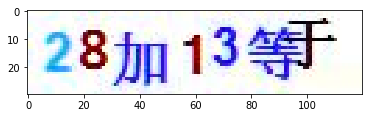

In [136]:
plt.imshow(im)

In [137]:
g_im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

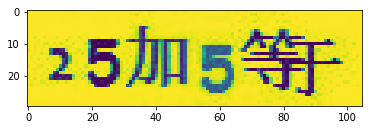

In [133]:
plt.imshow(g_im)

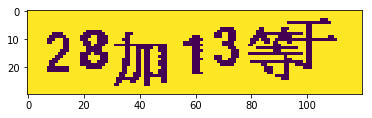

In [139]:
ret2,th2 = cv2.threshold(g_im,200,255,cv2.THRESH_BINARY)
# th2_g = cv2.GaussianBlur(th2,(3,3),0)
# ret2,th2 = cv2.threshold(th2_g,200,255,cv2.THRESH_BINARY)
plt.imshow(th2)

In [140]:
(new_img,contours,hiera)=cv2.findContours(th2,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [42]:
contours[0]

array([[[  0,   0]],

       [[  0,  29]],

       [[119,  29]],

       [[119,   0]]], dtype=int32)

In [37]:
def get_rect_box(contours):
    ws = []
    valid_contours = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if w < 7:
            continue
        valid_contours.append(contour)
        ws.append(w)

    w_min = min(ws)
    w_max = max(ws)

    result = []
    if len(valid_contours) == 4:
        for contour in valid_contours:
            x, y, w, h = cv2.boundingRect(contour)
            box = np.int0([[x,y], [x+w,y], [x+w,y+h], [x,y+h]])
            result.append(box)
    elif len(valid_contours) == 3:
        for contour in valid_contours:
            x, y, w, h = cv2.boundingRect(contour)
            if w == w_max:
                box_left = np.int0([[x,y], [x+w/2,y], [x+w/2,y+h], [x,y+h]])
                box_right = np.int0([[x+w/2,y], [x+w,y], [x+w,y+h], [x+w/2,y+h]])
                result.append(box_left)
                result.append(box_right)
            else:
                box = np.int0([[x,y], [x+w,y], [x+w,y+h], [x,y+h]])
                result.append(box)
    elif len(valid_contours) == 2:
        for contour in valid_contours:
            x, y, w, h = cv2.boundingRect(contour)
            if w == w_max and w_max >= w_min * 2:
                box_left = np.int0([[x,y], [x+w/3,y], [x+w/3,y+h], [x,y+h]])
                box_mid = np.int0([[x+w/3,y], [x+w*2/3,y], [x+w*2/3,y+h], [x+w/3,y+h]])
                box_right = np.int0([[x+w*2/3,y], [x+w,y], [x+w,y+h], [x+w*2/3,y+h]])
                result.append(box_left)
                result.append(box_mid)
                result.append(box_right)
            elif w_max < w_min * 2:
                box_left = np.int0([[x,y], [x+w/2,y], [x+w/2,y+h], [x,y+h]])
                box_right = np.int0([[x+w/2,y], [x+w,y], [x+w,y+h], [x+w/2,y+h]])
                result.append(box_left)
                result.append(box_right)
            else:
                box = np.int0([[x,y], [x+w,y], [x+w,y+h], [x,y+h]])
                result.append(box)
    elif len(valid_contours) == 1:
        contour = valid_contours[0]
        x, y, w, h = cv2.boundingRect(contour)
        box0 = np.int0([[x,y], [x+w/4,y], [x+w/4,y+h], [x,y+h]])
        box1 = np.int0([[x+w/4,y], [x+w*2/4,y], [x+w*2/4,y+h], [x+w/4,y+h]])
        box2 = np.int0([[x+w*2/4,y], [x+w*3/4,y], [x+w*3/4,y+h], [x+w*2/4,y+h]])
        box3 = np.int0([[x+w*3/4,y], [x+w,y], [x+w,y+h], [x+w*3/4,y+h]])
        result.extend([box0, box1, box2, box3])
    elif len(valid_contours) > 4:
        for contour in valid_contours:
            x, y, w, h = cv2.boundingRect(contour)
            box = np.int0([[x,y], [x+w,y], [x+w,y+h], [x,y+h]])
            result.append(box)
    result = sorted(result, key=lambda x: x[0][0])
    return result

In [38]:
boxes=get_rect_box(contours)

error
error
error


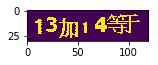

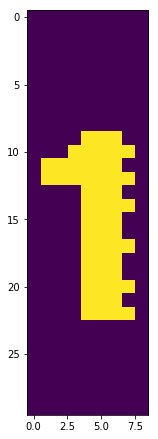

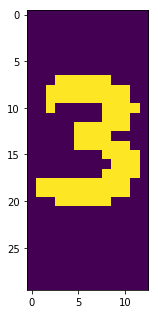

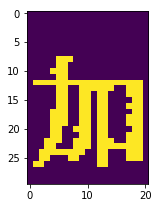

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [39]:
for index,box in enumerate(boxes):
    roi = th2[:, box[0][0]:box[1][0]]
    
#     new_i=cv2.resize(roi,(20,35))
    ret, new_i = cv2.threshold(roi,1,255,cv2.THRESH_BINARY_INV)

    plt.figure(figsize=(10,10))
    try:
        plt.subplot(1,4,index+1)
        plt.imshow(new_i)
    except Exception as e:
        print('error')
#     t=time.time()
#     folder=os.path.join(base_dir,label[index])
#     file = os.path.join(folder,'{}.jpg'.format(int(time.time()*100)))
#     cv2.imwrite(file,new_i)

In [52]:
g_im.shape

(30, 120)

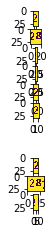

In [141]:
ws = []
valid_contours = []
l=len(contours)
img_list = []
for index,contour in enumerate(contours):
    x, y, w, h = cv2.boundingRect(contour)
    if w<50 and h>4:
        tmp_img = th2[0:g_im.shape[0],y:y+w]
        img_list.append(tmp_img)
    #   fig=plt.figure(figsize=(5,10))
        plt.subplot(l,1,index+1)
        plt.imshow(tmp_img)

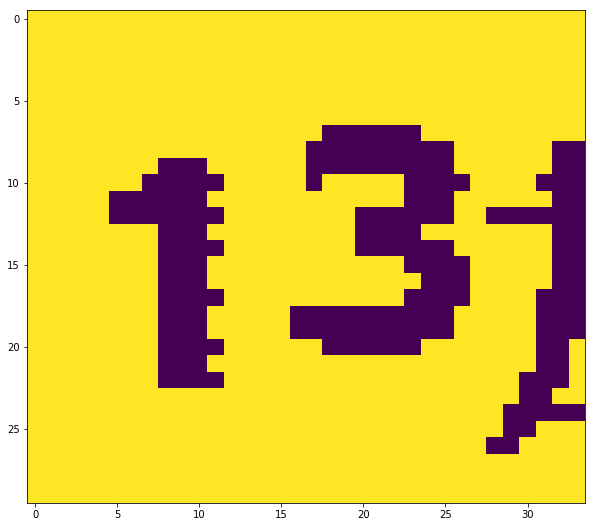

In [88]:
plt.figure(figsize=(10,20))
plt.imshow(img_list[7])

In [72]:
len(img_list)

12

In [152]:
result=[]
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if h>5 and w<60 and w>4:
        box = np.int0([[x,y], [x+w,y], [x+w,y+h], [x,y+h]])
        result.append(box)

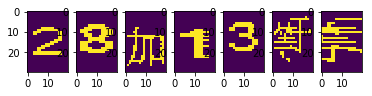

In [153]:
l=len(result)
result = sorted(result, key=lambda x: x[0][0])
for index,box in enumerate(result):
    roi = th2[:, box[0][0]:box[1][0]]
    
    new_i=cv2.resize(roi,(20,30))
    ret, new_i = cv2.threshold(new_i,1,255,cv2.THRESH_BINARY_INV)
#     new_i =cv2.resize(new_i,(15,30))
#     plt.figure(figsize=(10,10))
    try:
        plt.subplot(1,l,index+1)
        plt.imshow(new_i)
    except Exception as e:
        print('error')

In [155]:
os.chdir(r'E:\git\image_recognise\xinyong_shenzhen\image_data')

In [367]:
import time
def cut_file(file):
    im = cv2.imread(file)
    g_im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    ret2,th2 = cv2.threshold(g_im,230,255,cv2.THRESH_BINARY)
    (new_img,contours,hiera)=cv2.findContours(th2,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    result=[]
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if h>5 and w<60 and w>4:
            box = np.int0([[x,y], [x+w,y], [x+w,y+h], [x,y+h]])
            result.append(box)
    l=len(result)
    result = sorted(result, key=lambda x: x[0][0])
    for index,box in enumerate(result):
        roi = th2[:, box[0][0]:box[1][0]]

        new_i=cv2.resize(roi,(20,30))
        ret, new_i = cv2.threshold(new_i,1,255,cv2.THRESH_BINARY_INV)
    #     new_i =cv2.resize(new_i,(15,30))
    #     plt.figure(figsize=(10,10))
        try:
             cv2.imwrite('{}-{}.jpg'.format(int(time.time()*1000),index),new_i)
        except Exception as e:
            print('error')

In [366]:
for file in os.listdir('.'):
    if file.split('.')[-1]=='png':
        cut_file(file)

In [371]:
os.chdir(r'E:\git\image_recognise\xinyong_shenzhen\train')

In [370]:
parent_folder = r'E:\git\image_recognise\xinyong_shenzhen\train'

In [166]:
im = cv2.imread(r'E:\git\image_recognise\xinyong_shenzhen\train\9\1551881902476-2.jpg')

In [171]:
g_im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

In [172]:
g_im.shape

(30, 20)

In [173]:
g_im[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=uint8)

In [167]:
im.shape

(30, 20, 3)

In [169]:
ret2,th2 = cv2.threshold(im,200,255,cv2.THRESH_BINARY)

In [170]:
th2.shape

(30, 20, 3)

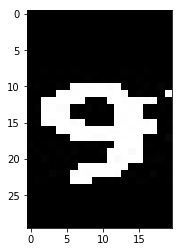

In [168]:
plt.imshow(im)

In [174]:
pil_im = Image.open(r'E:\git\image_recognise\xinyong_shenzhen\train\9\1551881902476-2.jpg').convert('L')

In [175]:
np_im = np.array(pil_im)

In [176]:
np_im.shape

(30, 20)

In [394]:
data=[]
label=[]
sample=700
for d in os.listdir('.'):
    sub_path = os.path.join(parent_folder,d)
    for each in os.listdir(sub_path)[:sample]:
        full_path=os.path.join(sub_path,each)
        im=cv2.imread(full_path)
        try:
            g_im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
        except Exception as e:
            print(full_path)
        else:
            data.append(g_im)
            
            label.append(map_dict[d])
#         print(each)
#     print(file)
# #     im = Image.open(file).convert('L')
# #     np_im = np.array(im)
#     cv2.imread(file)
#     ret2,th2 = cv2.threshold(np_im,200,255,cv2.THRESH_BINARY)
#     if re.search('-',file):
#         lb = file.split('-')[0]
#     else:
#         lb=file.split('.')[0]

        
#     lable.append(lb)
#     data.append(th2)

In [259]:
len(data)

2100

In [260]:
len(label)

2100

In [395]:
np_dataset = np.array(data)

In [396]:
np_labels=np.array(label)

In [397]:
X=np_dataset.copy()
y=np_labels.copy()

In [398]:
X.shape

(3908, 30, 20)

In [399]:
y[-1]

13

In [ ]:
map_dict={'0',1:'1',2:'2',3:'3',4:'4','5':5}

In [222]:
# 映射
map_dict={}
for i in range(10):
    map_dict[str(i)] = i


In [223]:
map_dict

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

In [224]:
map_dict['d']=10
map_dict['j']=11
map_dict['m']=12
map_dict['w']=13

In [225]:
map_dict

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'd': 10,
 'j': 11,
 'm': 12,
 'w': 13}

In [400]:
from sklearn.cross_validation import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
import pandas as pd
from keras.models import load_model

In [401]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train_4D = X_train.reshape(X_train.shape[0],30,20,1).astype('float32')
X_test_4D = X_test.reshape(X_test.shape[0],30,20,1).astype('float32')
X_train_4D_normal=X_train_4D/255
X_test_4D_normal=X_test_4D/255
y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)

In [402]:
from keras.models import Sequential

In [403]:
h=30
w=20

In [404]:
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [405]:
model = Sequential()

In [406]:
model.add(
   Conv2D(
   filters=16,
   kernel_size=(5,5),
   padding='same',
   input_shape=(h,w,1),
   activation='relu',
   )
)

In [407]:
model.add(
MaxPooling2D(pool_size=(2,2))
)

In [408]:
model.add(
MaxPooling2D(pool_size=(2,2))
)

In [409]:
model.add(Dropout(0.25))

In [410]:
model.add(Flatten())

In [411]:
model.add(
Dense(
128,activation='relu'
)
)

In [412]:
model.add(Dropout(0.5))

In [1]:
model.add(
Dense(
14,
    activation='softmax'
)
)

NameError: name 'model' is not defined

In [414]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 20, 16)        416       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 10, 16)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 5, 16)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 7, 5, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 560)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               71808     
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
__________

In [415]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [416]:
history_train = model.fit(x=X_train_4D_normal,
                         y=y_train_onehot,
                         validation_split=0.2,
                          epochs=10,
                          batch_size=100,
                          verbose = 2,
                         )

Train on 2500 samples, validate on 626 samples
Epoch 1/10
 - 1s - loss: 2.3310 - acc: 0.2812 - val_loss: 1.8214 - val_acc: 0.6102
Epoch 2/10
 - 1s - loss: 1.5537 - acc: 0.5444 - val_loss: 0.9891 - val_acc: 0.8227
Epoch 3/10
 - 1s - loss: 0.9862 - acc: 0.7248 - val_loss: 0.5513 - val_acc: 0.8994
Epoch 4/10
 - 1s - loss: 0.6669 - acc: 0.8116 - val_loss: 0.3371 - val_acc: 0.9553
Epoch 5/10
 - 1s - loss: 0.4955 - acc: 0.8584 - val_loss: 0.2306 - val_acc: 0.9808
Epoch 6/10
 - 1s - loss: 0.3662 - acc: 0.8968 - val_loss: 0.1443 - val_acc: 0.9904
Epoch 7/10
 - 1s - loss: 0.2964 - acc: 0.9188 - val_loss: 0.1058 - val_acc: 0.9936
Epoch 8/10
 - 1s - loss: 0.2418 - acc: 0.9364 - val_loss: 0.0695 - val_acc: 0.9936
Epoch 9/10
 - 1s - loss: 0.2079 - acc: 0.9488 - val_loss: 0.0562 - val_acc: 0.9936
Epoch 10/10
 - 1s - loss: 0.1667 - acc: 0.9596 - val_loss: 0.0407 - val_acc: 0.9952


In [282]:
score = model.evaluate(X_test_4D_normal,y_test_onehot)

420/420 [==============================] - 0s 298us/step


In [417]:
score

[0.09785111202370553, 0.9904761904761905]

In [418]:
prediction = model.predict_classes(X_test_4D_normal)

In [419]:
prediction

array([11,  2,  9, 10, 11,  3,  1,  1,  0,  9, 13, 10,  1,  1,  2, 12, 13,
       13,  7, 10, 11, 10,  3,  0, 10,  4, 12,  7, 12,  6,  4, 12,  7,  2,
        1,  1,  8,  6,  7,  6, 13,  2,  9, 11,  1,  1,  1,  1,  1,  1,  5,
        0,  7,  0,  3, 12,  7, 11,  6, 13,  6,  4,  1,  0, 13,  7,  1, 10,
        0,  2,  6,  1,  2,  1,  9,  1, 13,  5, 13,  3,  8,  2,  0,  1,  8,
       13,  5,  5,  2,  0,  1,  0,  1,  2,  8,  8,  9,  6,  4,  1,  7, 11,
       13,  1,  9,  6,  6,  9,  1, 10,  0,  2,  6,  3, 13,  0,  7,  2, 11,
        1,  1,  3,  0,  3, 10,  1,  9, 10,  7, 11,  1,  1,  0,  7,  1,  6,
        1, 11,  4,  9,  3,  0,  2,  7,  4,  5,  9, 12,  1, 12,  1,  1,  3,
        0,  7, 10,  8,  2, 10,  1,  9,  7,  7,  3,  2, 11,  4,  2, 12,  8,
        8,  3,  0,  1,  1,  1,  8,  0,  0, 10, 10,  1,  0, 11,  1,  0,  3,
        2,  5,  2,  5,  6,  1,  7,  1,  6,  1,  4,  1,  5,  5,  1,  8,  2,
       12,  6,  8,  1, 11, 10, 13, 13,  1,  2, 11,  1,  9, 11, 10,  1,  4,
       11,  5,  5,  6,  6

In [420]:
y_test

array([11,  2,  9, 10, 11,  3,  1,  1,  0,  9, 13, 10,  1,  1,  2, 12, 13,
       13,  7, 10, 11, 10,  3,  0, 10,  4, 12,  7, 12,  6,  4, 12,  7,  2,
        1,  1,  8,  6,  7,  6, 13,  2,  9, 11,  1,  1,  1,  1,  1,  1,  5,
        0,  7,  0,  3, 12,  7, 11,  6, 13,  6,  4,  1,  0, 13,  7,  1, 10,
        0,  2,  6,  1,  2,  1,  9,  1, 13,  5, 13,  3,  8,  2,  0,  1,  8,
       13,  5,  5,  2,  0,  1,  0,  1,  2,  8,  5,  9,  6,  4,  1,  7, 11,
       13,  1,  9,  6,  6,  9,  1, 10,  0,  2,  6,  3, 13,  0,  7,  2, 11,
        1,  1,  3,  0,  3, 10,  1,  9, 10,  7, 11,  1,  1,  0,  7,  1,  6,
        1, 11,  4,  9,  3,  0,  2,  7,  4,  5,  9, 12,  1, 12,  1,  1,  3,
        0,  7, 10,  8,  2, 10,  1,  9,  7,  7,  3,  2, 11,  4,  2, 12,  8,
        8,  3,  0,  1,  1,  1,  8,  0,  0, 10, 10,  1,  0, 11,  1,  0,  3,
        2,  5,  2,  5,  6,  1,  7,  1,  6,  1,  4,  1,  5,  5,  1,  8,  2,
       12,  6,  8,  1, 11, 10, 13, 13,  1,  2, 11,  1,  9, 11, 10,  1,  4,
       11,  5,  5,  6,  6

In [421]:
import pandas as pd
pd.crosstab(y_test,prediction)

col_0,0,1,2,3,4,5,6,7,8,9,10,11,12,13
row_0,,,,,,,,,,,,,,
0,57,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,144,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,60,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,53,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,51,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,40,1,0,2,0,0,0,0,0
6,0,0,0,0,0,2,61,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,56,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,29,0,0,0,0,0


In [422]:
model.save('xinyong_shenzhen_v2.h5')

In [423]:
os.chdir(r'E:\git\image_recognise\xinyong_shenzhen')

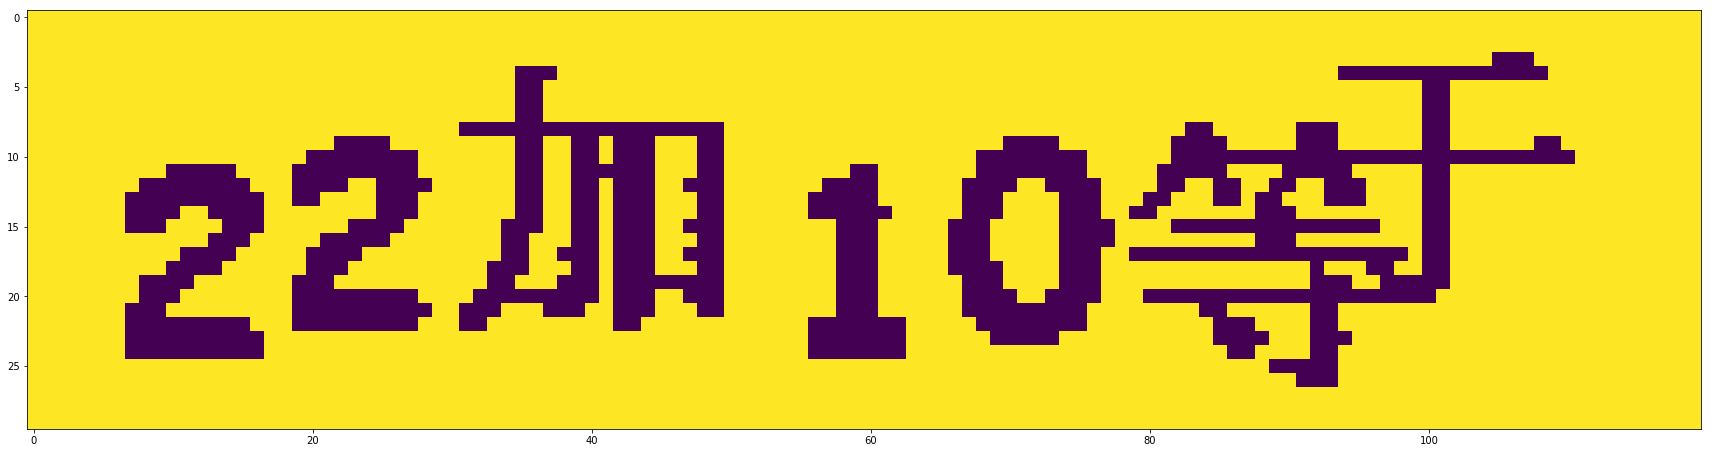

In [433]:
file='3610.png'
im = cv2.imread(file)
g_im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret2,th2 = cv2.threshold(g_im,200,255,cv2.THRESH_BINARY)
# th2_g = cv2.GaussianBlur(th2,(3,3),0)
# ret2,th2 = cv2.threshold(th2_g,200,255,cv2.THRESH_BINARY)
plt.figure(figsize=(30,20))
plt.imshow(th2)

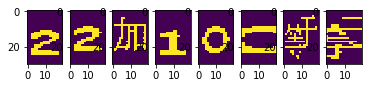

In [434]:
(new_img,contours,hiera)=cv2.findContours(th2,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
result=[]
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if h>5 and w<60 and w>4:
        box = np.int0([[x,y], [x+w,y], [x+w,y+h], [x,y+h]])
        result.append(box)
        
l=len(result)
result_img = []
result = sorted(result, key=lambda x: x[0][0])
for index,box in enumerate(result):
    roi = th2[:, box[0][0]:box[1][0]]
    
    new_i=cv2.resize(roi,(20,30))
    ret, new_i = cv2.threshold(new_i,1,255,cv2.THRESH_BINARY_INV)
#     new_i =cv2.resize(new_i,(15,30))
#     plt.figure(figsize=(10,10))
    try:
        result_img.append(new_i)
        plt.subplot(1,l,index+1)
        plt.imshow(new_i)
    except Exception as e:
        print('error')

In [435]:
real_data = np.array(result_img)
X_real=real_data.reshape(real_data.shape[0],30,20,1).astype('float32')
X_real_norm=X_real/255
ret = model.predict_classes(X_real_norm)

In [315]:
map_dict

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'd': 10,
 'j': 11,
 'm': 12,
 'w': 13}

In [427]:
dict_reverse = {}
for k,v in map_dict.items():
    dict_reverse[v]=k

In [317]:
dict_reverse

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'd',
 11: 'j',
 12: 'm',
 13: 'w'}

In [428]:
dict_reverse[11]='+'
dict_reverse[12]='*'

In [436]:
result_str=[]
for i in ret:
    if i==10 or i ==13:
        continue
    else:
        result_str.append(dict_reverse.get(i,''))

In [430]:
result_str

['1', '0', '*', '9']

In [437]:
r=''.join(result_str)

In [438]:
r

'22+10'

In [439]:
eval(r)

32